In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR

In [5]:
df=pd.read_csv("/content/tips (data for regression problem).csv")

In [6]:
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [7]:
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [8]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [10]:
categorical_columns=['sex','smoker','day','time','size']
numerical_columns=['total_bill','tip']

In [11]:
for x in categorical_columns:
  print(x)
  print(df[x].unique())

sex
['Female' 'Male']
smoker
['No' 'Yes']
day
['Sun' 'Sat' 'Thur' 'Fri']
time
['Dinner' 'Lunch']
size
[2 3 4 1 6 5]


<Axes: xlabel='total_bill', ylabel='tip'>

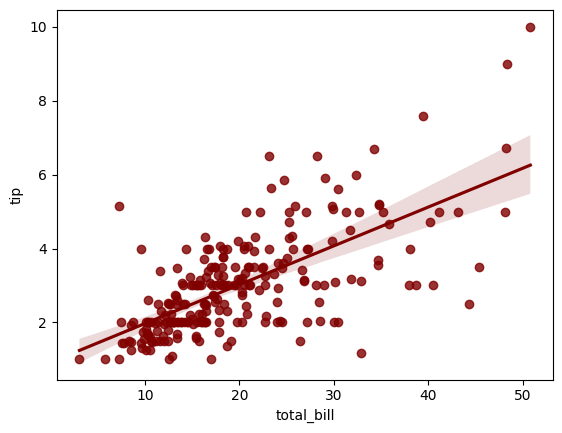

In [14]:
sns.regplot(x='total_bill',y='tip',data=df,color='#800000')

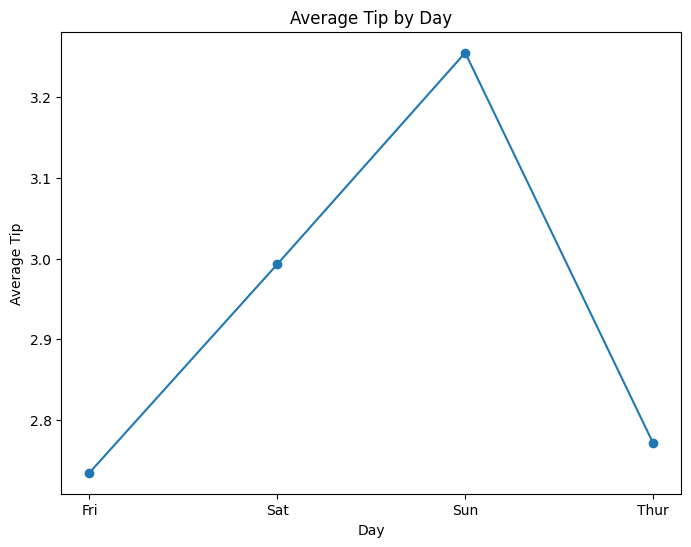

In [27]:
avg_tip_by_day = df.groupby('day')['tip'].mean().reset_index()
plt.figure(figsize=(8, 6))
plt.plot('day','tip', data=avg_tip_by_day, marker='o')
plt.title('Average Tip by Day')
plt.xlabel('Day')
plt.ylabel('Average Tip')
plt.show()


<Axes: xlabel='sex', ylabel='count'>

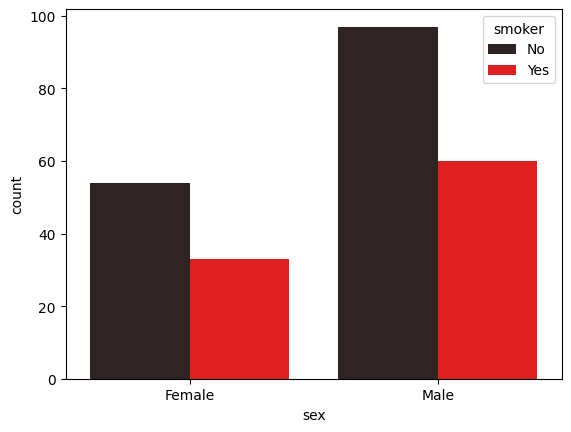

In [18]:
sns.countplot(x='sex',data=df,hue='smoker',palette='dark:red')

<Axes: xlabel='day', ylabel='count'>

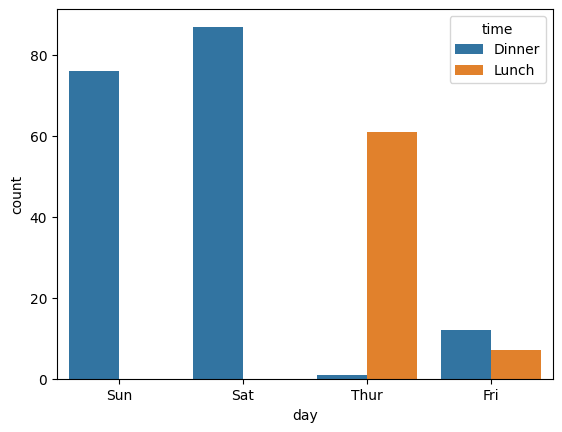

In [21]:
sns.countplot(x='day',data=df,hue='time')

## On weekends people prefer to have dinner rather lunch and on weekdays they prefer having lunch.


<Axes: xlabel='size', ylabel='count'>

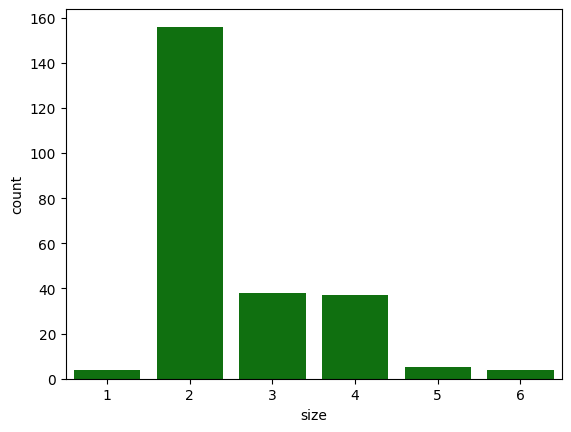

In [23]:
sns.countplot(x='size',data=df,color='#008000')

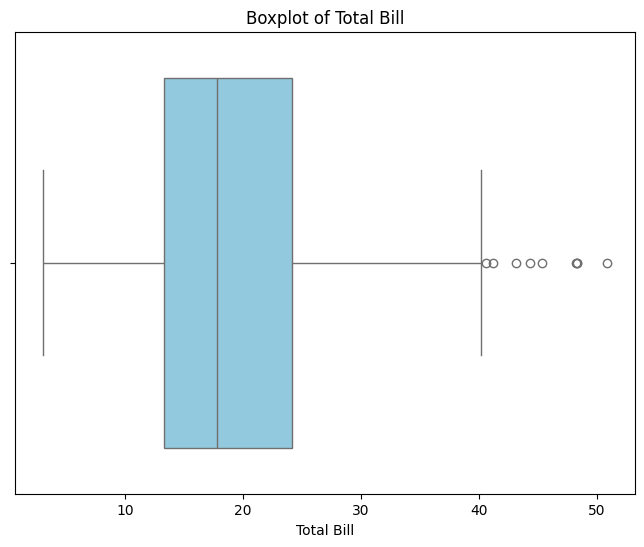

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["total_bill"], color="skyblue")
plt.title("Boxplot of Total Bill")
plt.xlabel("Total Bill")
plt.show()


<Axes: xlabel='total_bill', ylabel='Density'>

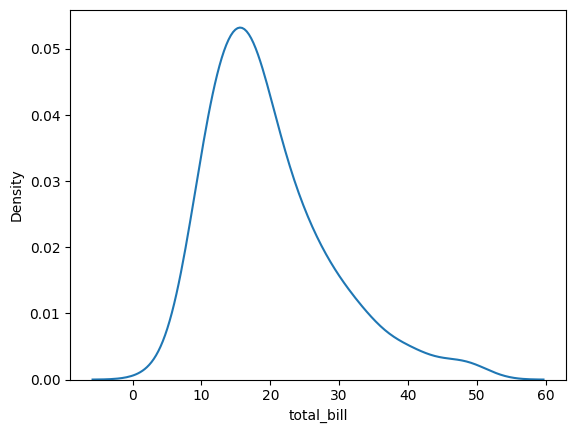

In [29]:
sns.kdeplot(df['total_bill'])

## Total bill is normally distributed


<Axes: xlabel='tip', ylabel='Density'>

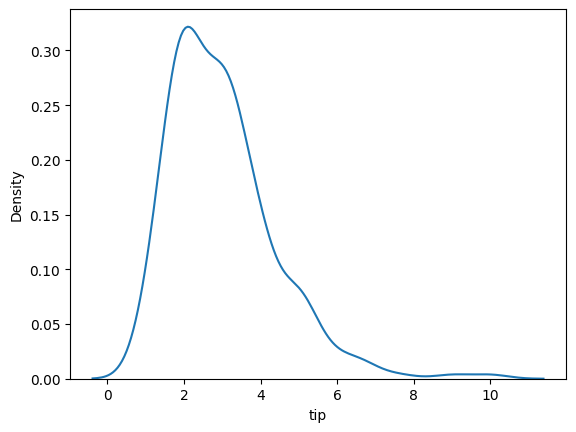

In [ ]:
sns.kdeplot(df['tip'])

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for x in categorical_columns:
  df[x]=le.fit_transform(df[x])

<Axes: >

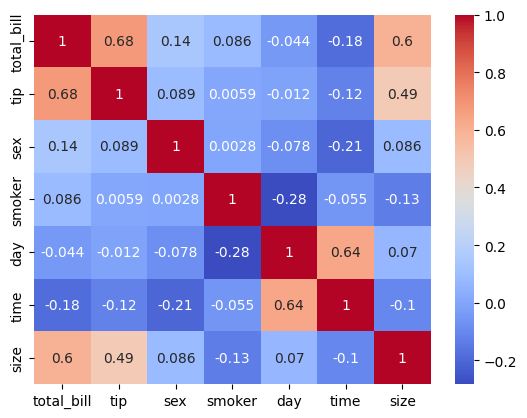

In [31]:
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')


##Tip is strongly related to total_bill(0.68) and size(0.49)

---



In [32]:
import pandas as pd
from scipy import stats
for col in categorical_columns:
    groups = [df['tip'][df[col] == category] for category in df[col].unique()]
    f_stat, p_value = stats.f_oneway(*groups)

    print(f'ANOVA test for {col}:')
    print(f'F-Statistic: {f_stat}, p-value: {p_value}')


    if p_value < 0.05:
        print(f"Result: There is a significant difference in tip based on '{col}'\n")
    else:
        print(f"Result: No significant difference in tip based on '{col}'\n")


ANOVA test for sex:
F-Statistic: 1.9261545619320046, p-value: 0.166456235034572
Result: No significant difference in tip based on 'sex'

ANOVA test for smoker:
F-Statistic: 0.008506013551529044, p-value: 0.926593152224447
Result: No significant difference in tip based on 'smoker'

ANOVA test for day:
F-Statistic: 1.6723551980998697, p-value: 0.1735885553040592
Result: No significant difference in tip based on 'day'

ANOVA test for time:
F-Statistic: 3.6338154836314573, p-value: 0.05780153475171573
Result: No significant difference in tip based on 'time'

ANOVA test for size:
F-Statistic: 15.746330672727057, p-value: 2.1694633916208174e-13
Result: There is a significant difference in tip based on 'size'



In [33]:
X=df[['total_bill','size']]
y=df['tip']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
lr=LinearRegression()
lr.fit(X_train,y_train)
print(r2_score(y_test,lr.predict(X_test)))

0.4811084097989492


In [37]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print(r2_score(y_test,lasso.predict(X_test)))

0.5273068720881755


In [38]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
print(r2_score(y_test,ridge.predict(X_test)))

0.4811866269989803


In [39]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
print(r2_score(y_test,rf.predict(X_test)))

0.37659451200043725


In [40]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')
grid_search.fit(X_train, y_train)
print(f'Best Parameters: {grid_search.best_params_}')
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print(f'R² Score with Best Hyperparameters: {r2_score(y_test, y_pred)}')


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
R² Score with Best Hyperparameters: 0.33972866300933513


In [41]:
svr=SVR()
svr.fit(X_train,y_train)
print(r2_score(y_test,svr.predict(X_test)))

0.5734686986577826


In [43]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.6 MB/s eta 0:00:00


In [44]:
import optuna
def objective(trial):
    C = trial.suggest_loguniform('C', 1e-2, 1e2)
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
    epsilon = trial.suggest_uniform('epsilon', 0.01, 0.5)
    model = SVR(C=C, kernel=kernel, gamma=gamma, epsilon=epsilon)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return r2_score(y_test, y_pred)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
print(f'Best Hyperparameters: {study.best_params}')
print(f'Best R² Score: {study.best_value}')


[I 2024-11-10 16:03:08,943] A new study created in memory with name: no-name-e793a2c3-996c-40d5-b9c2-85f74a9838a0
<ipython-input-44-909d2d4057a7>:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-2, 1e2)
<ipython-input-44-909d2d4057a7>:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  epsilon = trial.suggest_uniform('epsilon', 0.01, 0.5)
[I 2024-11-10 16:03:08,964] Trial 0 finished with value: 0.350521182215772 and parameters: {'C': 0.7564326876365454, 'kernel': 'rbf', 'gamma': 'auto', 'epsilon': 0.16136899600375643}. Best is trial 0 with value: 0.350521182215772.
<ipython-input-44-909d2d4057a7>:3: FutureWarning: suggest_loguniform has been deprecated i

Best Hyperparameters: {'C': 1.3117365323492047, 'kernel': 'rbf', 'gamma': 'scale', 'epsilon': 0.04485213441704843}
Best R² Score: 0.5737438581414632


Best Hyperparameters SVR: {'C': 0.010459952746615446, 'kernel': 'linear', 'gamma': 'scale', 'epsilon': 0.4987156885175518}

Best R² Score: 0.5169709025398859

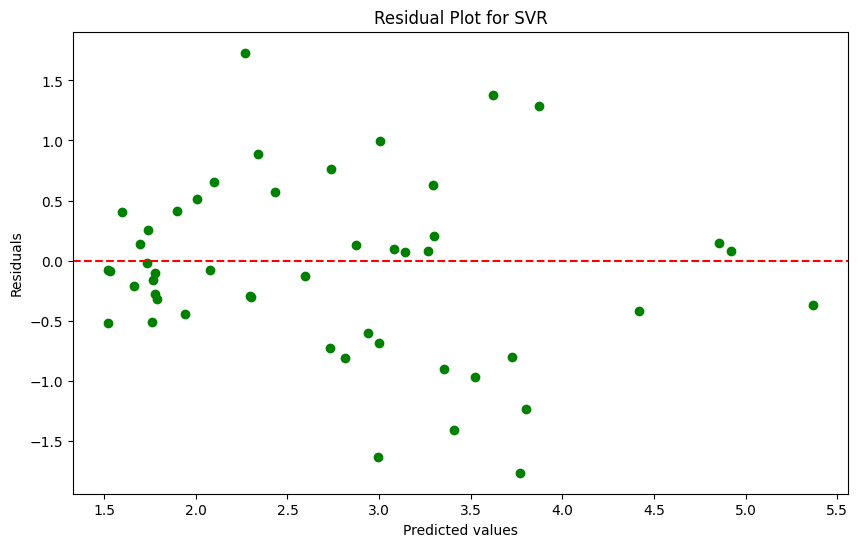

In [46]:
best_model = SVR(**study.best_params)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)
residuals = y_test - y_pred_best
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best, residuals, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot for SVR')
plt.show()


In [47]:
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)
print(r2_score(y_test,knn.predict(X_test)))

0.40844253722501


In [48]:
def objective(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 50)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'chebyshev'])
    p = trial.suggest_int('p', 1, 2)
    model = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights, metric=metric, p=p)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return r2_score(y_test, y_pred)
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
print(f"Best hyperparameters: {study.best_params}")
print(f"Best R² score: {study.best_value}")

[I 2024-11-10 16:03:48,306] A new study created in memory with name: no-name-5d4b62b3-29bb-4cba-bb44-5ea499996bcf
[I 2024-11-10 16:03:48,317] Trial 0 finished with value: 0.51581305334339 and parameters: {'n_neighbors': 27, 'weights': 'uniform', 'metric': 'chebyshev', 'p': 2}. Best is trial 0 with value: 0.51581305334339.
[I 2024-11-10 16:03:48,326] Trial 1 finished with value: 0.49897130873374484 and parameters: {'n_neighbors': 21, 'weights': 'uniform', 'metric': 'euclidean', 'p': 2}. Best is trial 0 with value: 0.51581305334339.
[I 2024-11-10 16:03:48,333] Trial 2 finished with value: 0.45974233400020914 and parameters: {'n_neighbors': 12, 'weights': 'distance', 'metric': 'chebyshev', 'p': 1}. Best is trial 0 with value: 0.51581305334339.
[I 2024-11-10 16:03:48,341] Trial 3 finished with value: 0.5030111208284189 and parameters: {'n_neighbors': 43, 'weights': 'distance', 'metric': 'euclidean', 'p': 2}. Best is trial 0 with value: 0.51581305334339.
[I 2024-11-10 16:03:48,349] Trial 4 

Best hyperparameters: {'n_neighbors': 38, 'weights': 'uniform', 'metric': 'manhattan', 'p': 1}
Best R² score: 0.5456789888284403


Best hyperparameters KNN Regressor: {'n_neighbors': 38, 'weights': 'uniform', 'metric': 'manhattan', 'p': 2}

Best R² score: 0.5456789888284403


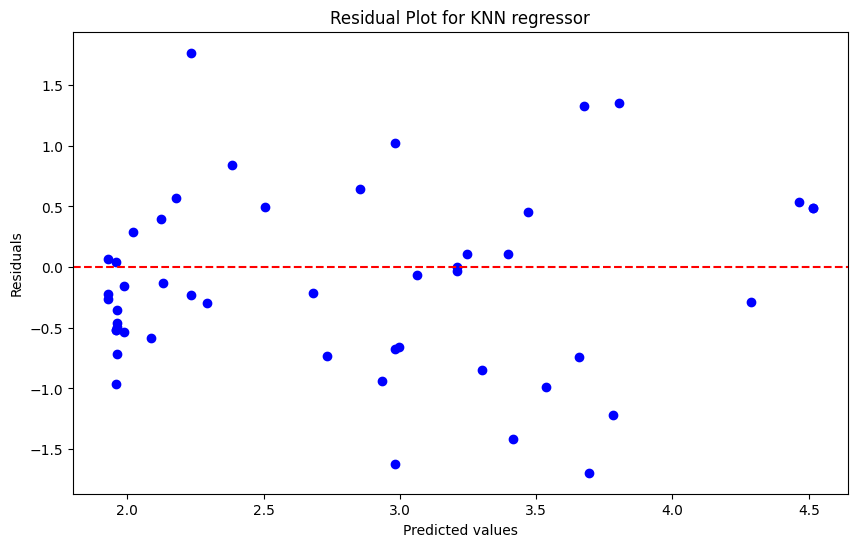

In [49]:
best_model = KNeighborsRegressor(**study.best_params)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)
residuals = y_test - y_pred_best
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best, residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot for KNN regressor')
plt.show()


In [50]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
print(r2_score(y_test,dt.predict(X_test)))

0.11663444379832844


In [51]:
def objective(trial):
    max_depth = trial.suggest_int('max_depth', 1, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    model = DecisionTreeRegressor(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return r2_score(y_test, y_pred)
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
print(f"Best hyperparameters: {study.best_params}")
print(f"Best R² score: {study.best_value}")

[I 2024-11-10 16:04:17,058] A new study created in memory with name: no-name-81a4ea0f-3aa2-4665-88af-ce76b0458e90
[I 2024-11-10 16:04:17,067] Trial 0 finished with value: 0.2588244746384244 and parameters: {'max_depth': 1, 'min_samples_split': 8, 'min_samples_leaf': 19, 'max_features': 'log2'}. Best is trial 0 with value: 0.2588244746384244.
[I 2024-11-10 16:04:17,074] Trial 1 finished with value: 0.4018598525168019 and parameters: {'max_depth': 24, 'min_samples_split': 12, 'min_samples_leaf': 16, 'max_features': 'log2'}. Best is trial 1 with value: 0.4018598525168019.
[I 2024-11-10 16:04:17,082] Trial 2 finished with value: 0.4691988503652421 and parameters: {'max_depth': 13, 'min_samples_split': 18, 'min_samples_leaf': 20, 'max_features': None}. Best is trial 2 with value: 0.4691988503652421.
[I 2024-11-10 16:04:17,089] Trial 3 finished with value: 0.4691988503652421 and parameters: {'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 20, 'max_features': None}. Best is trial 

Best hyperparameters: {'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 16, 'max_features': None}
Best R² score: 0.4789667033177817


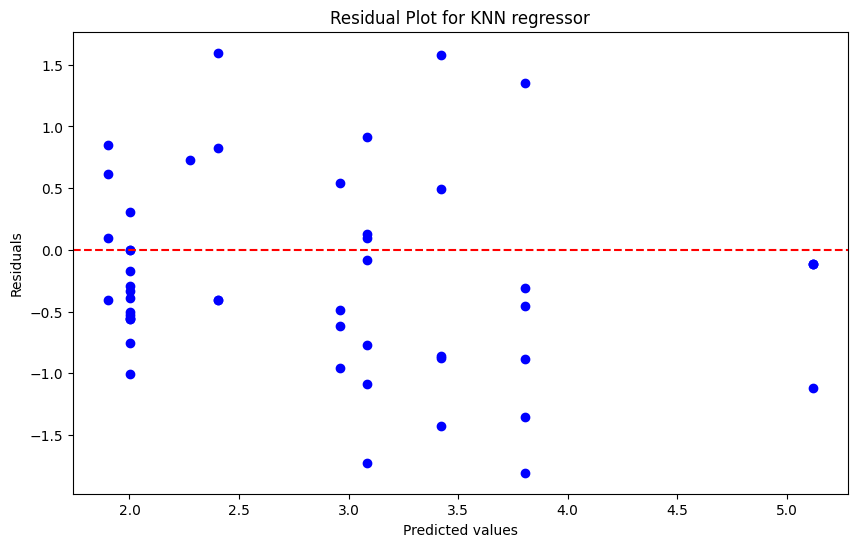

In [52]:
best_model = DecisionTreeRegressor(**study.best_params)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)
residuals = y_test - y_pred_best
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best, residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot for KNN regressor')
plt.show()

Best hyperparameters for Decision Tree: {'max_depth': 18, 'min_samples_split':15, 'min_samples_leaf': 16, 'max_features': None}


Best R² score: 0.4789667033177817

##Best Regressor Model is SVR with r2 score of 0.5734686986577826

 Customer count on weekdays is more that too for dinner
 They should try to manage customer properly during that time period
